In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


path = "datasets/LEAF_LEVEL_DATASET_Yufeng_Ge.xlsx"

# Read and load dataset
df= pd.read_excel(path, sheet_name="in")





INPUT DATA

In [23]:
X = (df.iloc[:,14:]).values
lambdas = df.iloc[:,14:].columns.to_list()
lambdas = list(map(str, lambdas))
indexed_data = []
for x in X:
    indexed_data.append( dict(zip(lambdas, x)))

print(indexed_data[:20])

[{'350': 0.105342415, '351': 0.124944142, '352': 0.107555044, '353': 0.076747575, '354': 0.079308935, '355': 0.082873197, '356': 0.090530194, '357': 0.099886322, '358': 0.101892352, '359': 0.096420256, '360': 0.077200893, '361': 0.054847358, '362': 0.061422896, '363': 0.058950795, '364': 0.053123391, '365': 0.051751671, '366': 0.036609031, '367': 0.050773403, '368': 0.06743925, '369': 0.052495678, '370': 0.052528577, '371': 0.049432261, '372': 0.043118139, '373': 0.045875673, '374': 0.043973874, '375': 0.044173474, '376': 0.046318086, '377': 0.0393719, '378': 0.034904452, '379': 0.036571165, '380': 0.041699051, '381': 0.037763542, '382': 0.035795123, '383': 0.037940468, '384': 0.041316691, '385': 0.036015354, '386': 0.03760423, '387': 0.042917177, '388': 0.037248523, '389': 0.034209297, '390': 0.034922407, '391': 0.037395973, '392': 0.037795075, '393': 0.036928848, '394': 0.035492152, '395': 0.034298174, '396': 0.034344955, '397': 0.034342958, '398': 0.035517208, '399': 0.038620717, '4

GAUSSIAN DISTRIBUTION

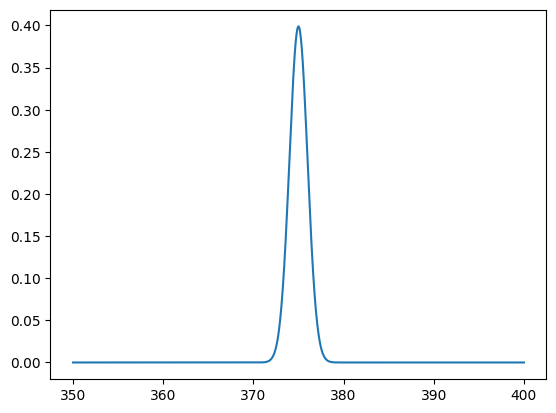

In [6]:
sigma = 1
mu = 375

def gaussian(r):
 return [(1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mu)/sigma)**2) for x in r]


x = np.linspace(350,400,1000)
y = gaussian(x)
plt.plot(x,y)
plt.show()

5 bands, fwhm = 20

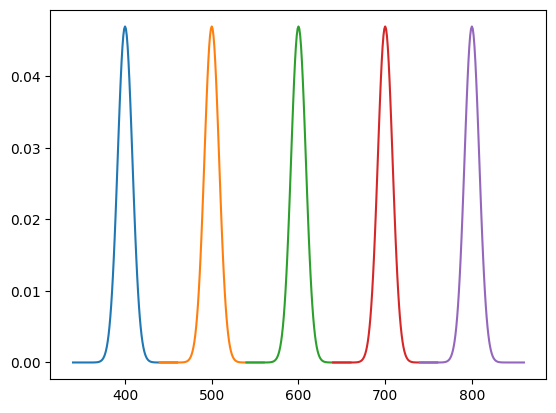

In [121]:
from math import sqrt, log

n_bands = 5
fwhm = 20
sigma = fwhm/(2*sqrt(2*log(2)))
mu_list= np.linspace(400,800,n_bands)
filters = []

for mu in mu_list:
    x = np.arange(mu-3*fwhm,mu+3*fwhm + 1, dtype=int) #1nm delta
    y = gaussian(x)
    filters.append(dict(zip(map(str, x), y)))
    plt.plot(x,y)

plt.show()

Apply Filter

In [68]:
'''Get First 4 signals'''

signals = indexed_data[:4]
filtered_signals = []

for signal in signals:
    filtered_signal = []
    for filter in filters: 
        result = 0
        for key, value in filter.items():
            if signal.get(key) != None:
                result+=value*signal.get(key)
        filtered_signal.append(result)
    filtered_signals.append(filtered_signal)


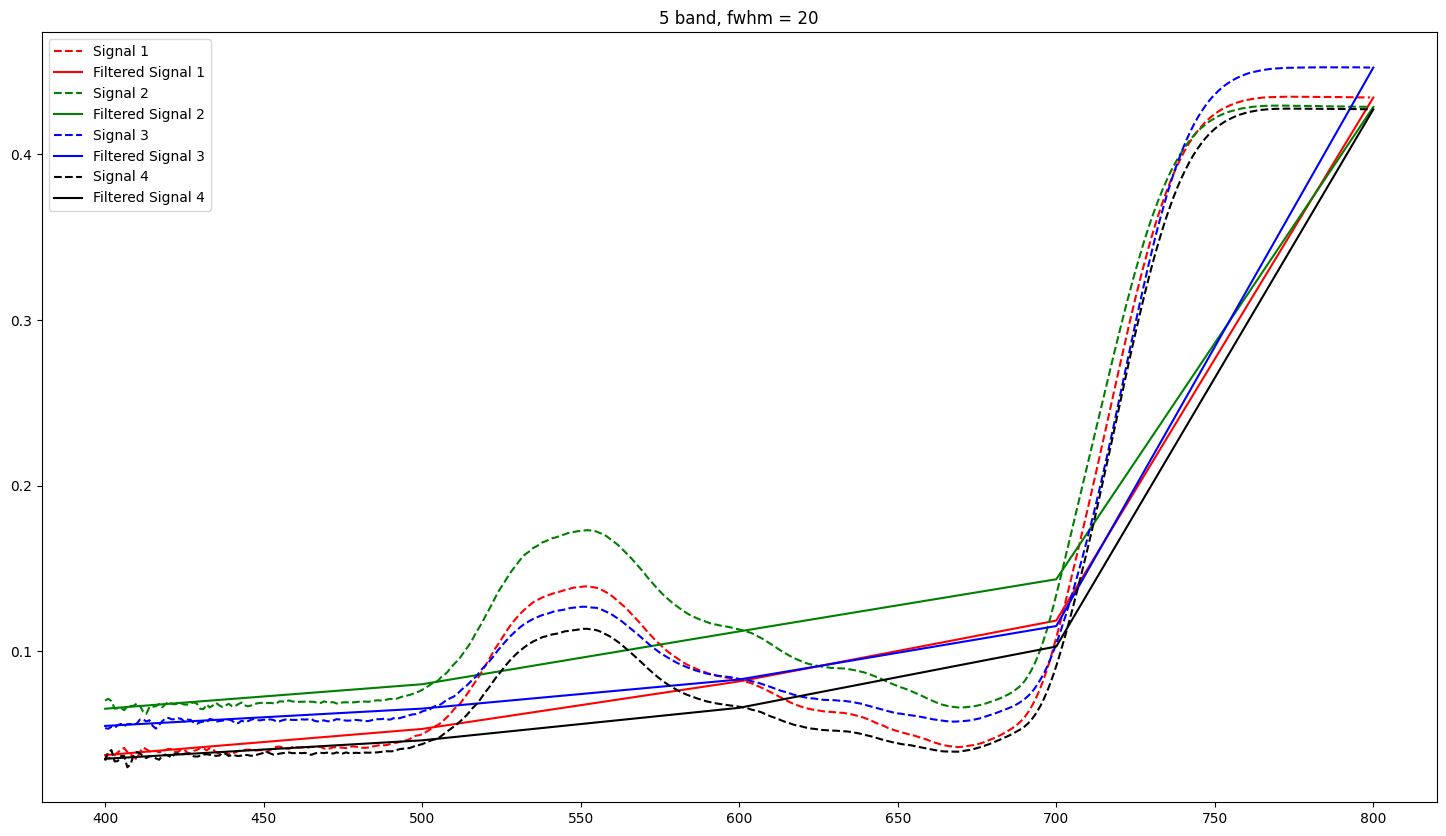

In [124]:
colors = ["r","g","b","k","y"]

keys = np.arange(400,800, dtype=int)
plt.figure(figsize=(18,10))

for i, filtered_signal in enumerate(filtered_signals):
    signal_to_plot = [signals[i][str(key)] for key in keys]
    plt.plot(keys, signal_to_plot,"--",color=colors[i], label=f"Signal {i+1}")
    plt.plot(mu_list,filtered_signal,color=colors[i],label=f"Filtered Signal {i+1}")


plt.title(f"{n_bands} band, fwhm = {fwhm}")
plt.legend()
plt.show()